# Laboratorio 5

Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este laboratorio.
Recuerde utilizar comentarios para describir lo que está haciendo en cada parte del proceso y así dejar
constancia del entendimiento de su trabajo. Estará usando el juego de datos proporcionado dentro del
portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr su notebook.

El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran diferentes
parámetros que suelen ser considerados por las universidades para admitir a los postulantes en los
programas de postgrado (maestrías), además se muestra la probabilidad de admisión de estas personas.
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

Para este ejercicio se le pide que proporcione un modelo de regresión lineal multidimensional
regularizada que prediga la admisión del alumno usando todas las características que considere
necesarias

In [1]:
#importando librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Detalles estadísticos 
df. describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
 df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df = df.sample(frac=1)

In [8]:
#Implementación de ecuaciones vistas en clase
def linear_cost(X, y, theta, lam):
    h = X @ theta
    regul = (lam/(2*X.shape[0])) * np.sum(theta**2)
    return ((h - y) ** 2).sum() / (2*len(X)) + regul

def linear_cost_gradient(X, y, theta, lam):
    h = X @ theta
    regul = lam * theta
    return (((h - y).T @ X).T + regul)/ X.shape[0]

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate, threshold,
    max_iter=1000, lam=5
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta, lam)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta, lam)
        costs.append(cost_function(X, y, theta, lam))
        thetas.append(theta.copy())

    return theta, costs, thetas

In [9]:
df['ones'] = np.ones(len(df))
X = np.array(df.iloc[:,1:8].copy())
y = np.array(df.iloc[:,[8]].copy())

X_train = X[:250]
X_cv = X[251:350]
X_test = X[351:400]
y_train = y[:250]
y_cv = y[251:350]
y_test = y[351:400]

In [10]:
m, n = X.shape
theta_0 = np.random.rand(n,1)
print(theta_0)

[[0.20368658]
 [0.0889556 ]
 [0.23056324]
 [0.56974975]
 [0.39640581]
 [0.47109705]
 [0.94176491]]


## Grado 1

In [11]:
theta, costs, thetas = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00001, 0.001, 3)
theta

array([[-0.02883966],
       [ 0.00990322],
       [ 0.22818009],
       [ 0.56717484],
       [ 0.39379204],
       [ 0.46475668],
       [ 0.94132429]])

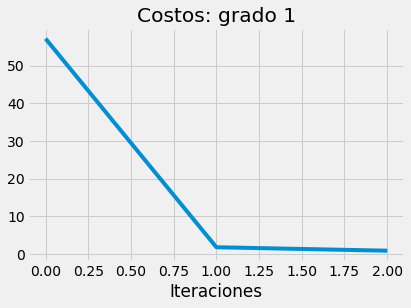

In [12]:
with plt.style.context('fivethirtyeight'):
    plt.plot(costs)
    plt.xlabel('Iteraciones')
    plt.title('Costos: grado 1')

In [13]:
print(round(costs[len(costs)-1],4))

0.9169


In [14]:
print('test: ', round(linear_cost(X_test, y_test, theta, 10), 3), ' cross-v cost: ', round(linear_cost(X_cv, y_cv, theta, 10), 3))

test:  1.022  cross-v cost:  0.897


## P. Grado 2 

In [15]:
theta2, costs2, thetas2 = gradient_descent(X_train**2, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00000001, 0.001, 3)
theta2

array([[2.94653591e+04],
       [3.40862249e+03],
       [3.67650274e+00],
       [4.42199414e+00],
       [4.30155161e+00],
       [2.24097899e+01],
       [1.11368702e+00]])

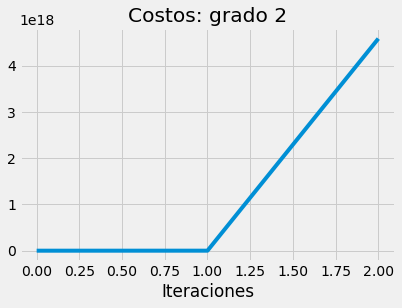

In [16]:
with plt.style.context('fivethirtyeight'):
    plt.plot(costs2)
    plt.xlabel('Iteraciones')
    plt.title('Costos: grado 2')

In [17]:
print(round(costs2[len(costs2)-1],4))

4.5822645571377597e+18


In [18]:
print('Test: ', round(linear_cost(X_test**2, y_test, theta2, 3), 2), ' cross-v cost: ', round(linear_cost(X_cv**2, y_cv, theta2, 3), 2))

Test:  4.332000715449104e+18  cross-v cost:  4.4889690833402624e+18


# Conslusiones 
El polinimio grado uno muestra ser el de mejor costo, lo cual puede visualizarse en la gráfica. 